In [8]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


data = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [9]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


---

Determine the relationship between the discrete data in the data set and Price

---

In [15]:
xSet = data[['Mileage', 'Cylinder', 'Doors']]
ySet = data['Price']

xSet[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(xSet[['Mileage', 'Cylinder', 'Doors']].as_matrix())

print (xSet)

      Mileage  Cylinder     Doors
0   -1.417485  0.527410  0.556279
1   -1.305902  0.527410  0.556279
2   -0.810128  0.527410  0.556279
3   -0.426058  0.527410  0.556279
4    0.000008  0.527410  0.556279
5    0.293493  0.527410  0.556279
6    0.335001  0.527410  0.556279
7    0.382369  0.527410  0.556279
8    0.511409  0.527410  0.556279
9    0.914768  0.527410  0.556279
10  -1.171368  0.527410  0.556279
11  -0.581834  0.527410  0.556279
12  -0.390532  0.527410  0.556279
13  -0.003899  0.527410  0.556279
14   0.430591  0.527410  0.556279
15   0.480156  0.527410  0.556279
16   0.509822  0.527410  0.556279
17   0.757160  0.527410  0.556279
18   1.594886  0.527410  0.556279
19   1.810849  0.527410  0.556279
20  -1.326046  0.527410  0.556279
21  -1.129860  0.527410  0.556279
22  -0.667658  0.527410  0.556279
23  -0.405792  0.527410  0.556279
24  -0.112796  0.527410  0.556279
25  -0.044552  0.527410  0.556279
26   0.190700  0.527410  0.556279
27   0.337442  0.527410  0.556279
28   0.566102 

In [16]:
total = sm.OLS(ySet, xSet).fit()

total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     18.11
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           2.23e-11
Time:                        21:49:21   Log-Likelihood:                -9207.1
No. Observations:                 804   AIC:                         1.842e+04
Df Residuals:                     801   BIC:                         1.843e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, it is evident that Cylinder has the greatest factor for price as it has the largest coef. 

---

Proof: 

In [17]:
ySet.groupby(data.Cylinder).mean()

Cylinder
4    17862.564874
6    20081.395841
8    38968.043180
Name: Price, dtype: float64

----

My initial assumption was that miles and price had a correlation: 

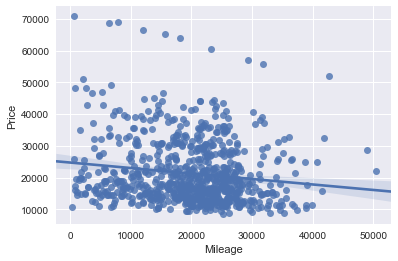

In [18]:

sns.set(style='darkgrid', color_codes=True)

c = sns.regplot(data=data, x='Mileage', y='Price')

It is clear that there is no correlation 

To further prove this... what is r squared:


In [14]:
from sklearn.metrics import r2_score

x = data[['Mileage']]
y = data[['Price']]

r2 = r2_score(y, x)

print(r2)


-0.948170025851


As a result, r sqaured is almost 0 indicating that there is no correlation